In [1]:
import pandas as pd
#boston csv 파일에 칼럼이름이 정의되어 있지 않아서 따로 정의함
column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_pd = pd.read_csv('./boston_house_price.csv', sep= "\s+", names=column_name)

In [2]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


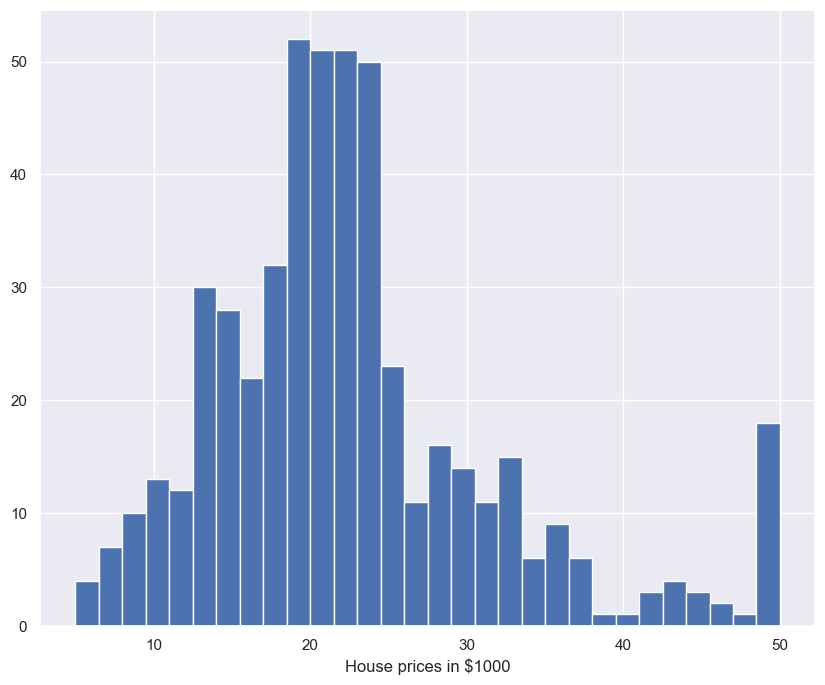

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})
plt.hist(boston_pd['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<Axes: >

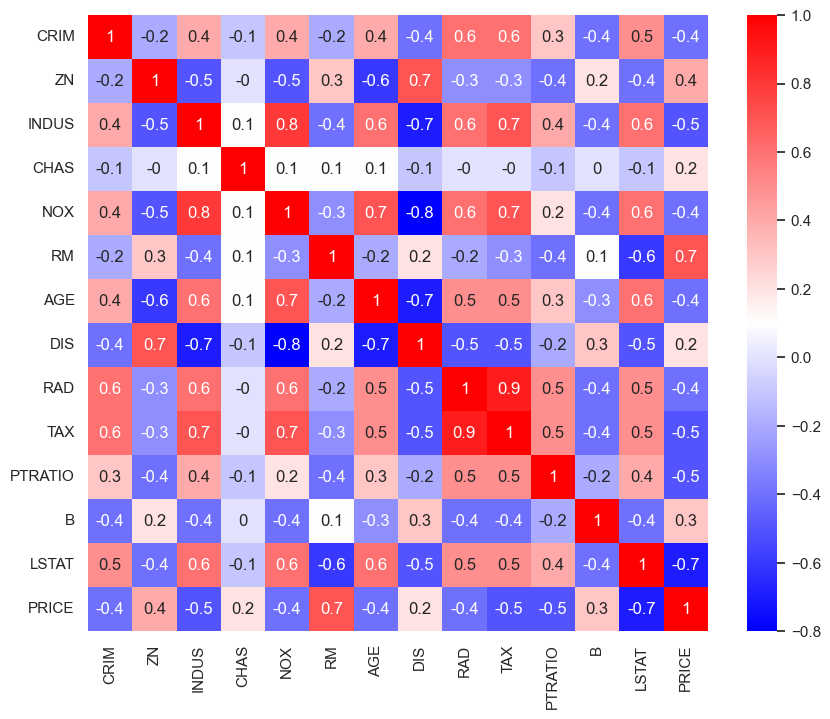

In [5]:
correlation_matrix = boston_pd.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

<Axes: xlabel='LSTAT', ylabel='PRICE'>

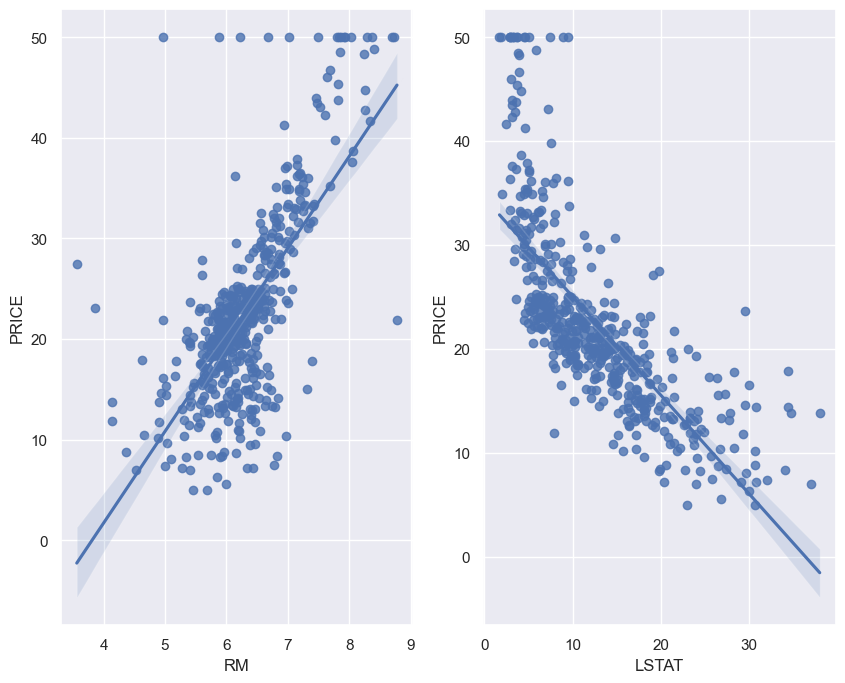

In [6]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=axs[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=axs[1])

In [7]:
import numpy as np
X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

print(np.array(X_rooms).shape)

(506,)


In [8]:
X_rooms = np.array(X_rooms).reshape(-1,1)
print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rooms, y_price, test_size=0.2, random_state=77)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  6.773930079666117


In [12]:
y_test_predict = reg.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("----------------------------------")
print("RMSE is ", rmse)

The model performance for test set
----------------------------------
RMSE is  5.885123878168727


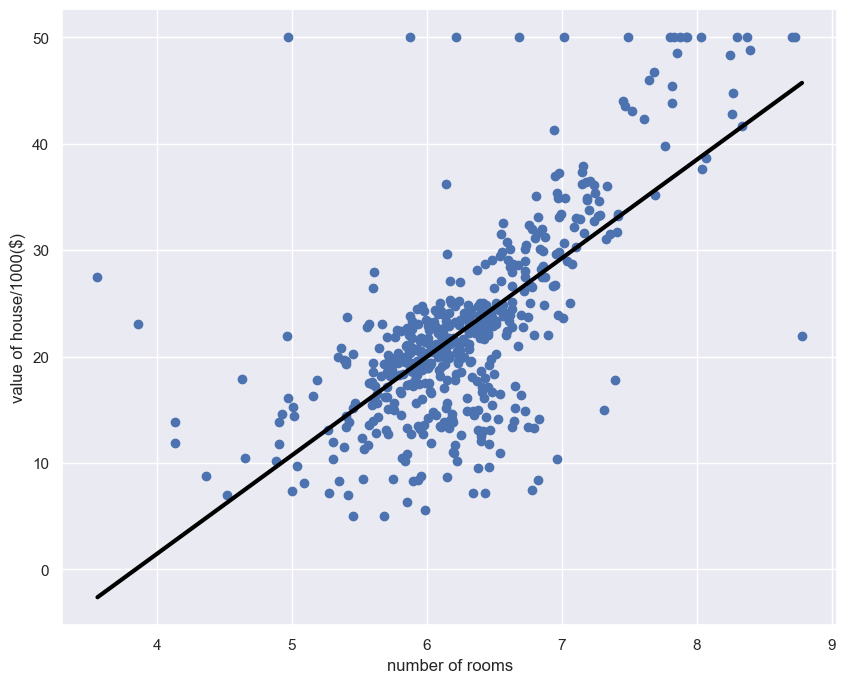

In [13]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

In [14]:
X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
              

LinearRegression()

In [15]:
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for training set
--------------------------------------
RMSE is  4.780762027920525


In [16]:
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for test set
--------------------------------------
RMSE is  4.350775600983441


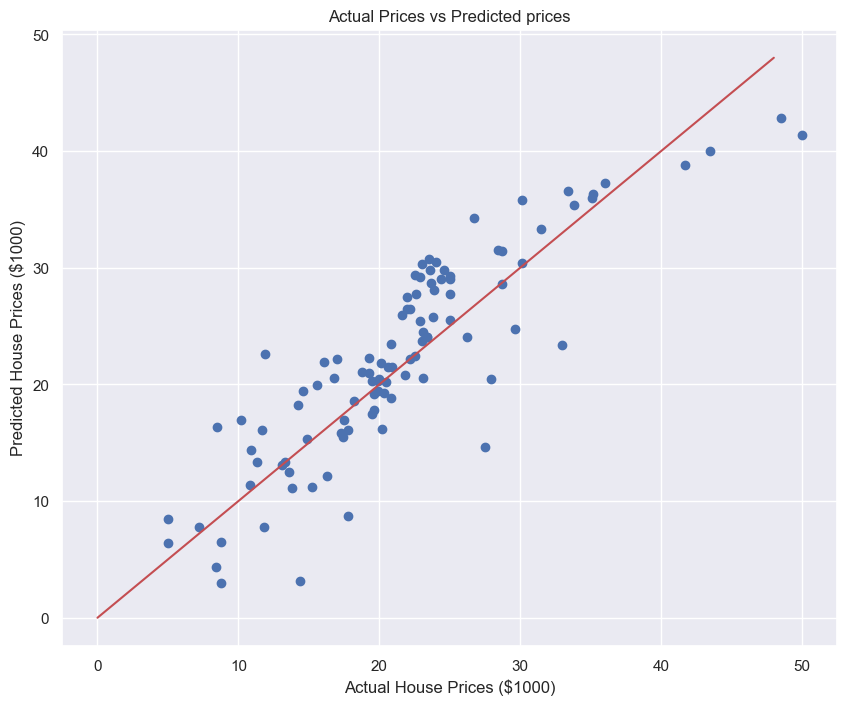

In [17]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.plot([0,48], [0, 48], 'r')